本節介紹如何使用布林遮罩來檢查和操作NumPy數組中的值。
當您想要根據某些標準提取，修改，計算或以其他方式操縱數組中的值時，
屏蔽會出現：例如，您可能希望計算大於某個值的所有值，或者可能刪除高
於某些值的所有異常值閾。在NumPy中，布爾掩碼通常是完成這些類型任務
的最有效方法。

In [1]:
import numpy as np
import pandas as pd

In [3]:
# 使用pandas去取得雨量英吋數放在Numpy陣列中
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

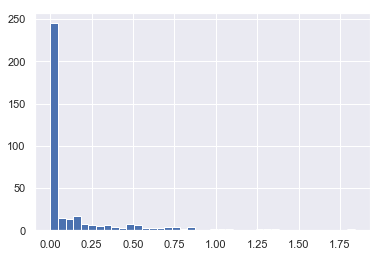

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #設定繪圖樣式
plt.hist(inches, 40)

In [5]:
#透過布林值取出你想要的資料項
x = np.array([1, 2, 3, 4, 5])

In [6]:
x < 3  # less than

array([ True,  True, False, False, False])

In [7]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [8]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [9]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [10]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [11]:
x == 3  # equal

array([False, False,  True, False, False])

In [13]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])


Operator	Equivalent ufunc		Operator	Equivalent ufunc
==	           np.equal		           !=	      np.not_equal
<	           np.less		           <=	      np.less_equal
>	           np.greater		       >=	      np.greater_equal

In [14]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [15]:
#計算項目數量 計算在一個布林中有多少個True np.count_nonzero就很有用
np.count_nonzero(x < 6)#小於6的值有多少個?

8

In [16]:
np.sum(x < 6)#透過sum去取,這時False is 0 , True is 1,sum可以沿著欄或列進行

8

In [17]:
np.sum(x < 6, axis=1)#沿著列

array([4, 2, 2])

In [18]:
np.sum(x < 6, axis=0)#沿著欄

array([2, 2, 2, 2])

In [19]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


In [20]:
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315
